In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv('Nutrition,_Physical_Activity,_and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20251118.csv')
print(df.shape)
df.head()

(106260, 33)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [22]:
df["Question"].unique()[:20]

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve more than 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who engage in

In [23]:
obesity_df.shape


(17694, 34)

In [24]:
obesity_df[["YearStart", "LocationAbbr", "StratificationCategory1", "Stratification1", "Data_Value", "high_obesity"]].head()


,YearStart,LocationAbbr,StratificationCategory1,Stratification1,Data_Value,high_obesity
0,2011,AL,Income,"$15,000 - $24,999",34.8,0
1,2011,AL,Income,"$25,000 - $34,999",35.8,1
2,2011,AL,Income,"$35,000 - $49,999",32.3,0
3,2011,AL,Income,"$50,000 - $74,999",34.1,0
4,2011,AL,Income,"$75,000 or greater",28.8,0


In [15]:
obesity_df = df[df["Question"].str.contains("obesity", case=False, na=False)].copy()
print(obesity_df.shape)
obesity_df.head()


(20020, 33)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [16]:
obesity_df["Data_Value"] = pd.to_numeric(obesity_df["Data_Value"], errors="coerce")
obesity_df = obesity_df.dropna(subset=["Data_Value"])

obesity_df["high_obesity"] = (obesity_df["Data_Value"] >= 35).astype(int)

obesity_df[["YearStart", "LocationAbbr", "StratificationCategory1",
            "Stratification1", "Data_Value", "high_obesity"]].head()



,YearStart,LocationAbbr,StratificationCategory1,Stratification1,Data_Value,high_obesity
0,2011,AL,Income,"$15,000 - $24,999",34.8,0
1,2011,AL,Income,"$25,000 - $34,999",35.8,1
2,2011,AL,Income,"$35,000 - $49,999",32.3,0
3,2011,AL,Income,"$50,000 - $74,999",34.1,0
4,2011,AL,Income,"$75,000 or greater",28.8,0


In [17]:
X = obesity_df[["YearStart", "LocationAbbr", "StratificationCategory1", "Stratification1"]]
y = obesity_df["high_obesity"]



In [18]:
X.head(), y.value_counts()


(   YearStart LocationAbbr StratificationCategory1     Stratification1
 0       2011           AL                  Income   $15,000 - $24,999
 1       2011           AL                  Income   $25,000 - $34,999
 2       2011           AL                  Income   $35,000 - $49,999
 3       2011           AL                  Income   $50,000 - $74,999
 4       2011           AL                  Income  $75,000 or greater,
 high_obesity
 0    12515
 1     5179
 Name: count, dtype: int64)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = obesity_df[["YearStart", "LocationAbbr", "StratificationCategory1", "Stratification1"]]
y = obesity_df["high_obesity"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Preprocessing
numeric_features = ["YearStart"]
categorical_features = ["LocationAbbr", "StratificationCategory1", "Stratification1"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Pipeline: preprocessing -> model
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=3000))
])

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8343128390596745

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3129
           1       0.76      0.63      0.69      1295

    accuracy                           0.83      4424
   macro avg       0.81      0.78      0.79      4424
weighted avg       0.83      0.83      0.83      4424



/Users/amritaupadhyay/IshitaProjects/DAT300/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


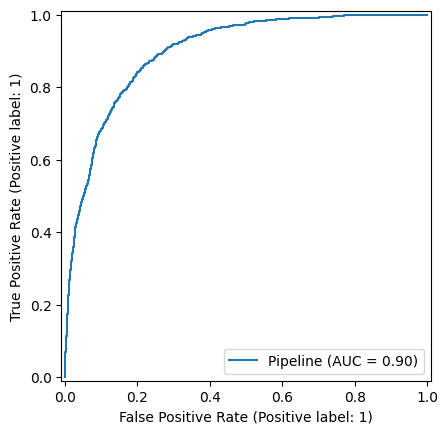

In [26]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8591772151898734

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      3129
           1       0.78      0.73      0.75      1295

    accuracy                           0.86      4424
   macro avg       0.83      0.82      0.83      4424
weighted avg       0.86      0.86      0.86      4424



In [28]:
# Extract feature names after one-hot encoding
ohe = rf_clf.named_steps["preprocessor"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_features)

feature_names = list(cat_features) + numeric_features

# Extract feature importances from the model
importances = rf_clf.named_steps["model"].feature_importances_

# Create a dataframe sorted by importance
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Show top 15 features
fi_df.head(15)


,feature,importance
0,LocationAbbr_AK,0.245998
85,Stratification1_Non-Hispanic White,0.029238
54,LocationAbbr_WY,0.020355
27,LocationAbbr_MT,0.018115
67,Stratification1_2 or more races,0.017072
71,Stratification1_55 - 64,0.016581
82,Stratification1_Less than high school,0.016533
20,LocationAbbr_MA,0.015265
74,Stratification1_Asian,0.014780
76,Stratification1_Data not reported,0.014423
